<h3> Imports

In [29]:
#Pytorch
import torch
import torch.nn.functional as F 

#Maths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Sckit 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Regular expressions
import re

#Others
import seaborn as sns
import time
import string
import os
import random

In [30]:
#NLP
import nltk
# nltk.download()

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
#TorchText
import torchtext
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader
from torchtext.data.functional import to_map_style_dataset

<h3>Loading News Data

In [32]:
data = pd.read_csv('datasets/news-article-categories.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  6877 non-null   object
 1   title     6877 non-null   object
 2   body      6872 non-null   object
dtypes: object(3)
memory usage: 161.3+ KB


In [33]:
data.describe()

,category,title,body
count,6877,6877,6872
unique,14,6836,6815
top,ARTS & CULTURE,Extreme Weather Photos Of The Week,This week brought several big headlines in ext...
freq,1002,24,21


In [34]:
data.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [35]:
data[data['body'].isnull()]

,category,title,body
536,ARTS & CULTURE,An Avant-garde Artist for Avant-garde Minds: A...,NaN
1816,COMEDY,...New Again?,NaN
1833,COMEDY,Why Do We See Life Through Rose-Colored Glasses?,NaN
1858,COMEDY,She Stands Alone,NaN
1860,COMEDY,Show and Tell,NaN


In [36]:
data = data.dropna()
data.reset_index(inplace=True)

<h3>Exploring Categories

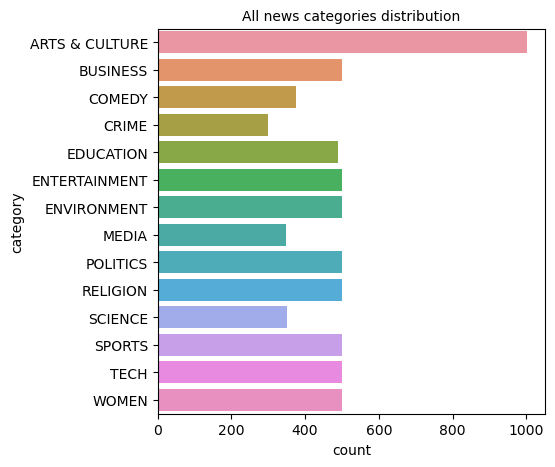

In [37]:
#Plot horizontal category distribution
plt.figure(figsize = [5, 5])
sns.countplot(y=data["category"], orient = 'h')
plt.title("All news categories distribution", fontsize = 10)
plt.show()

<h3> Text Preprocessing

DO NOT RUN. Cleaned output already saved in csv.

In [38]:

# # Defining a Function to clean up the reviews 
# def text_preprocess(ds: pd.Series) -> pd.Series:
#     """
#     Apply NLP Preprocessing Techniques to the reviews.
#     """
#     i=0
#     for m in range(len(ds)):
#         # PUT PROGRESS BAR BEFORE NEXT RUN
#         main_words = re.sub('[^a-zA-Z]', ' ', ds[m])                                      # Retain only alphabets
#         main_words = (main_words.lower()).split()
#         main_words = [w for w in main_words if not w in set(stopwords.words('english'))]  # Remove stopwords
        
#         lem = WordNetLemmatizer()
#         main_words = [lem.lemmatize(w) for w in main_words if len(w) > 1]                 # Group different forms of the same word
        
#         main_words = ' '.join(main_words)
#         ds[m] = main_words

#     return ds

# ## This next operation is likely to take around 15 minutes
# data['body'] = text_preprocess(data['body'])
# data.head()

In [39]:
# data = data.dropna()

In [40]:
# data.to_csv('../deepL/datasets/news-article-categories-clean.csv', index= False)

In [41]:
data = pd.read_csv('datasets/news-article-categories-clean.csv')
data.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,october carolyn kramer received disturbing pho...
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,week talked actor jeff hiller hit broadway pla...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,new yorker taking president donald trump asked...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,kellen hickey year old life hudson wisconsin g...
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,something combining traditional uptight look r...


<h3> Prediction

<h4> Target

In [42]:
# Spliting into X & y
# X = data[['title', 'body']]
# y = data['category']
X = data.iloc[:, 2].values
y = data.iloc[:, 0].values

<h4> TF-IDF Matrix

In [43]:
# Building a TF IDF matrix out of the corpus of reviews
td = TfidfVectorizer(max_features = 4500)
X_vect = td.fit_transform(X).toarray()

<h4> Train / Test split

In [44]:
# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.3,random_state = 0)

<h4> Naive Bayes

In [45]:
# Training the classifier, predicting on test data & evaluating performance with classification metrics

# Training the classifier & predicting on test data
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
classification_report1 = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report1)


 Accuracy:  0.7322987390882638

Classification Report

                 precision    recall  f1-score   support

ARTS & CULTURE       0.60      0.93      0.73       302
      BUSINESS       0.62      0.68      0.65       137
        COMEDY       0.89      0.55      0.68       115
         CRIME       0.82      0.76      0.79        95
     EDUCATION       0.86      0.81      0.84       156
 ENTERTAINMENT       0.76      0.64      0.69       151
   ENVIRONMENT       0.74      0.73      0.74       150
         MEDIA       0.91      0.46      0.61       108
      POLITICS       0.65      0.78      0.71       149
      RELIGION       0.83      0.83      0.83       157
       SCIENCE       0.90      0.56      0.69       108
        SPORTS       0.88      0.87      0.87       137
          TECH       0.77      0.69      0.73       153
         WOMEN       0.66      0.60      0.63       144

      accuracy                           0.73      2062
     macro avg       0.78      0.71      0.73

<h4> K-NN

In [46]:
nb_neigh = 20
accuracy = [0]*nb_neigh
for i in range(1,nb_neigh):
    # Training the classifier & predicting on test data
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)

    accuracy[i] = accuracy_score(y_test, y_pred)


c:\Users\julie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\julie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

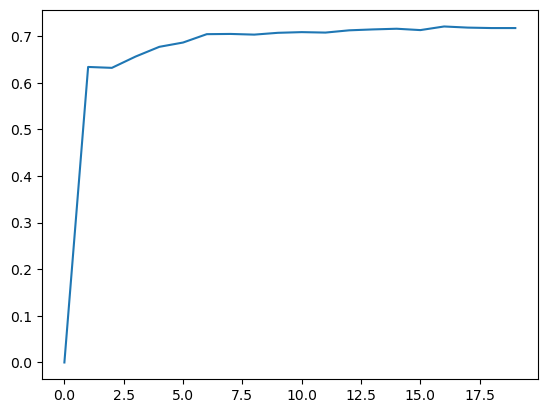

In [47]:
plt.plot(accuracy)

In [73]:
neigh = 7

# Training the classifier & predicting on test data
classifier = KNeighborsClassifier(n_neighbors = neigh)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_train)

# Classification metrics
classification_report2 = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report2)
print('\n Accuracy: ', accuracy_score(y_train, y_pred2))

c:\Users\julie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



 Accuracy:  0.7046556741028128

Classification Report

                 precision    recall  f1-score   support

ARTS & CULTURE       0.71      0.75      0.73       302
      BUSINESS       0.64      0.71      0.67       137
        COMEDY       0.69      0.61      0.65       115
         CRIME       0.65      0.73      0.69        95
     EDUCATION       0.79      0.86      0.82       156
 ENTERTAINMENT       0.60      0.58      0.59       151
   ENVIRONMENT       0.66      0.75      0.71       150
         MEDIA       0.79      0.54      0.64       108
      POLITICS       0.62      0.71      0.66       149
      RELIGION       0.75      0.80      0.78       157
       SCIENCE       0.81      0.61      0.70       108
        SPORTS       0.81      0.85      0.83       137
          TECH       0.75      0.74      0.74       153
         WOMEN       0.65      0.49      0.56       144

      accuracy                           0.70      2062
     macro avg       0.71      0.69      0.70

c:\Users\julie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<h4> Decision Tree

In [49]:
# Training the classifier & predicting on test data
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
classification_report4 = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report4)


 Accuracy:  0.507274490785645

Classification Report

                 precision    recall  f1-score   support

ARTS & CULTURE       0.66      0.60      0.63       302
      BUSINESS       0.38      0.45      0.41       137
        COMEDY       0.50      0.52      0.51       115
         CRIME       0.55      0.49      0.52        95
     EDUCATION       0.68      0.60      0.64       156
 ENTERTAINMENT       0.40      0.42      0.41       151
   ENVIRONMENT       0.47      0.49      0.48       150
         MEDIA       0.38      0.25      0.30       108
      POLITICS       0.40      0.44      0.42       149
      RELIGION       0.58      0.58      0.58       157
       SCIENCE       0.58      0.53      0.55       108
        SPORTS       0.61      0.60      0.60       137
          TECH       0.40      0.48      0.44       153
         WOMEN       0.45      0.48      0.47       144

      accuracy                           0.51      2062
     macro avg       0.50      0.50      0.50 

<h4> Random Forest

<h5> Grid Search

In [74]:
n_est = [2000]

depth = [5]

min_samp_split = [10]

min_leaf = [10]

cpt_i = 0
cpt_j = 0
cpt_k = 0
cpt_l = 0

accuracy = np.zeros([len(n_est), len(depth), len(min_samp_split), len(min_leaf)])
for i in n_est:
    cpt_j=0
    for j in depth:
        cpt_k=0
        for k in min_samp_split:
            cpt_l=0
            for l in min_leaf:
                # Training the classifier & predicting on test data
                print(i,j,k,l)
                classifier = RandomForestClassifier(n_estimators =i, max_depth=j, min_samples_split = k , min_samples_leaf = l, random_state=0)
                classifier.fit(X_train, y_train)
    
                y_pred = classifier.predict(X_test)

                print(accuracy_score(y_test, y_pred))
                accuracy[cpt_i, cpt_j, cpt_k, cpt_l] = accuracy_score(y_test, y_pred)
                cpt_l+=1
            cpt_k+=1
        cpt_j+=1
    cpt_i+=1
    
    
    

2000 5 10 10
0.42531522793404464


In [50]:
min_depth = 15
max_depth = 30

accuracy = [0]*(max_depth-min_depth)

for i in range(min_depth,max_depth):
    # Training the classifier & predicting on test data
    classifier = RandomForestClassifier(max_depth=i, random_state=0)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)

    accuracy[i-min_depth] = accuracy_score(y_test, y_pred)


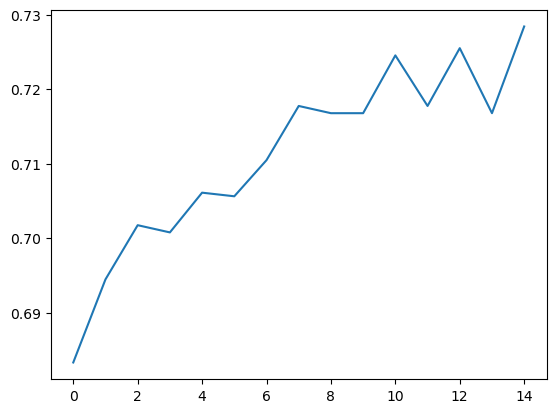

In [51]:
plt.plot(accuracy)

In [71]:
depth = 5

# Training the classifier & predicting on test data
classifier = RandomForestClassifier(max_depth=depth, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_train)

# Classification metrics
classification_report3 = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report3)
print('\n Accuracy train: ', accuracy_score(y_train, y_pred2))


 Accuracy:  0.42870999030067897

Classification Report

                 precision    recall  f1-score   support

ARTS & CULTURE       0.22      0.98      0.37       302
      BUSINESS       0.58      0.10      0.17       137
        COMEDY       0.81      0.42      0.55       115
         CRIME       0.88      0.07      0.14        95
     EDUCATION       0.81      0.78      0.79       156
 ENTERTAINMENT       0.67      0.01      0.03       151
   ENVIRONMENT       0.86      0.12      0.21       150
         MEDIA       0.00      0.00      0.00       108
      POLITICS       0.76      0.46      0.57       149
      RELIGION       0.85      0.58      0.69       157
       SCIENCE       0.85      0.26      0.40       108
        SPORTS       0.85      0.76      0.80       137
          TECH       0.74      0.37      0.49       153
         WOMEN       0.67      0.21      0.32       144

      accuracy                           0.43      2062
     macro avg       0.68      0.37      0.3

c:\Users\julie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h4> Logistic Regression

In [66]:
# Training the classifier & predicting on test data
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_train)
# Classification metrics
classification_report5 = classification_report(y_test, y_pred)

print('\n Accuracy test: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report5)

print('\n Accuracy train: ', accuracy_score(y_train, y_pred2))


 Accuracy test:  0.7919495635305529

Classification Report

                 precision    recall  f1-score   support

ARTS & CULTURE       0.80      0.89      0.84       302
      BUSINESS       0.62      0.71      0.66       137
        COMEDY       0.85      0.67      0.75       115
         CRIME       0.79      0.79      0.79        95
     EDUCATION       0.89      0.82      0.85       156
 ENTERTAINMENT       0.77      0.79      0.78       151
   ENVIRONMENT       0.73      0.85      0.78       150
         MEDIA       0.85      0.67      0.75       108
      POLITICS       0.75      0.76      0.75       149
      RELIGION       0.86      0.89      0.87       157
       SCIENCE       0.93      0.70      0.80       108
        SPORTS       0.90      0.90      0.90       137
          TECH       0.77      0.75      0.76       153
         WOMEN       0.70      0.71      0.71       144

      accuracy                           0.79      2062
     macro avg       0.80      0.78     